In [ ]:
import numpy as np
import pandas as pd

In [ ]:
iris = pd.read_csv("iris.csv")

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [ ]:
X = iris.drop('species',axis=1)
y = iris['species']

In [ ]:
y.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
y = encoder.fit_transform(y)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [ ]:
scaler = MinMaxScaler()

In [ ]:
scaler.fit(X_train)

MinMaxScaler()

In [ ]:
scaled_X_train = scaler.transform(X_train)

In [ ]:
scaled_X_test = scaler.transform(X_test)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [ ]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stop = EarlyStopping(patience = 10)

In [ ]:
model.fit(x=scaled_X_train, 
          y=y_train, 
          epochs=300,
          validation_data=(scaled_X_test, y_test),  callbacks=[early_stop]         )

Epoch 1/300
4/4 [==============================] - 1s 140ms/step - loss: 1.1454 - accuracy: 0.3167 - val_loss: 1.0509 - val_accuracy: 0.4000
Epoch 2/300
4/4 [==============================] - 0s 22ms/step - loss: 1.1367 - accuracy: 0.3167 - val_loss: 1.0469 - val_accuracy: 0.4000
Epoch 3/300
4/4 [==============================] - 0s 14ms/step - loss: 1.1296 - accuracy: 0.3167 - val_loss: 1.0431 - val_accuracy: 0.4000
Epoch 4/300
4/4 [==============================] - 0s 16ms/step - loss: 1.1223 - accuracy: 0.3167 - val_loss: 1.0397 - val_accuracy: 0.4000
Epoch 5/300
4/4 [==============================] - 0s 15ms/step - loss: 1.1152 - accuracy: 0.3167 - val_loss: 1.0364 - val_accuracy: 0.4000
Epoch 6/300
4/4 [==============================] - 0s 20ms/step - loss: 1.1093 - accuracy: 0.3167 - val_loss: 1.0334 - val_accuracy: 0.4000
Epoch 7/300
4/4 [==============================] - 0s 20ms/step - loss: 1.1023 - accuracy: 0.3167 - val_loss: 1.0307 - val_accuracy: 0.4000
Epoch 8/300
4/4 [==

In [ ]:
metrics = pd.DataFrame(model.history.history)

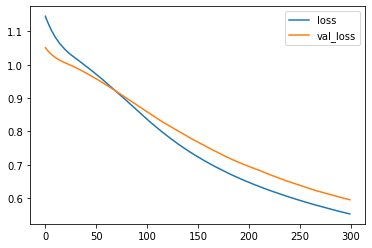

In [ ]:
metrics[['loss', 'val_loss']].plot()

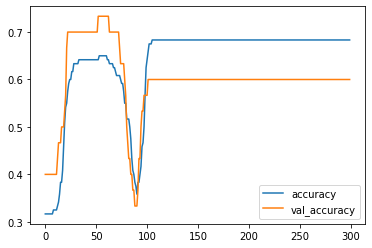

In [ ]:
metrics[['accuracy', 'val_accuracy']].plot()

In [ ]:
model.evaluate(scaled_X_test, y_test, verbose = 0)

[0.595592200756073, 0.6000000238418579]

In [ ]:
epochs = len(metrics)

In [ ]:
epochs

300

In [ ]:
scaled_X = scaler.fit_transform(X)

In [ ]:
model = Sequential()
model.add(Dense(units=4,activation='relu',input_shape=[4,]))

model.add(Dense(units=3,activation='softmax'))

model.compile(optimizer = 'adam', 
              loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [ ]:
model.fit(scaled_X, y, epochs = epochs)

Epoch 1/300
5/5 [==============================] - 0s 4ms/step - loss: 1.1095 - accuracy: 0.3467
Epoch 2/300
5/5 [==============================] - 0s 4ms/step - loss: 1.1051 - accuracy: 0.3533
Epoch 3/300
5/5 [==============================] - 0s 4ms/step - loss: 1.1005 - accuracy: 0.3467
Epoch 4/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0958 - accuracy: 0.3333
Epoch 5/300
5/5 [==============================] - 0s 4ms/step - loss: 1.0916 - accuracy: 0.3533
Epoch 6/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0869 - accuracy: 0.3400
Epoch 7/300
5/5 [==============================] - 0s 2ms/step - loss: 1.0824 - accuracy: 0.3400
Epoch 8/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0781 - accuracy: 0.3400
Epoch 9/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0735 - accuracy: 0.3467
Epoch 10/300
5/5 [==============================] - 0s 3ms/step - loss: 1.0694 - accuracy: 0.3600
Epoch 11/300
5/5 [===========

In [ ]:
model.save("final_iris_model2.h5")

In [ ]:
import joblib

In [ ]:
joblib.dump(scaler, 'iris_scaler2.pkl')

['iris_scaler2.pkl']

In [ ]:
from tensorflow.keras.models import load_model

In [ ]:
flower_model = load_model('final_iris_model.h5')

In [ ]:
flower_scaler = joblib.load("iris_scaler.pkl")

In [ ]:
iris.head(1)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa


In [ ]:
flower_example = {"sepal_length":5.1, 
                  "sepal_width":3.5,
                  "petal_length":1.4,
                  "petal_width":0.2}

In [ ]:
encoder.classes_

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [ ]:
def return_prediction(model, scaler, sample_json):

  s_len = sample_json["sepal_length"]
  s_wid = sample_json["sepal_width"]
  p_len = sample_json["petal_length"]
  p_wid = sample_json["petal_width"]

  flower = [[s_len, s_wid, p_len, p_wid]]

  classes = np.array(['setosa', 'versicolor', 'virginica'])

  flower = scaler.transform(flower)

  class_ind = np.argmax(model.predict(flower), axis=-1)[0]

  return classes[class_ind]

In [ ]:
return_prediction(flower_model, flower_scaler, flower_example)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  "X does not have valid feature names, but"


'setosa'

# Code for Deployment

In [ ]:
from tensorflow.keras.models import load_model
import joblib

flower_model = load_model('final_iris_model.h5')
flower_scaler = joblib.load("iris_scaler.pkl")

def return_prediction(model, scaler, sample_json):

  s_len = sample_json["sepal_length"]
  s_wid = sample_json["sepal_width"]
  p_len = sample_json["petal_length"]
  p_wid = sample_json["petal_width"]

  flower = [[s_len, s_wid, p_len, p_wid]]

  classes = np.array(['setosa', 'versicolor', 'virginica'])

  flower = scaler.transform(flower)

  class_ind = np.argmax(model.predict(flower), axis=-1)[0]

  return classes[class_ind]